In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-test/last_test.pkl
/kaggle/input/arrnab/new_train.pkl
/kaggle/input/arrnab/new_test.pkl
/kaggle/input/abcdef/final_train.pkl
/kaggle/input/abcdef/final_test.pkl


In [2]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats
from tqdm import tqdm  # Progress bar

import pickle  # To load data int disk
from prettytable import PrettyTable  # To print in tabular format

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler  # Standardizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # One hot Encoder
from scipy.sparse import csr_matrix  # For sparse matrix

from sklearn.model_selection import train_test_split
# Different Models
from sklearn.linear_model import LogisticRegression, SGDClassifier  # LR
from sklearn.svm import LinearSVC  # SVM
from sklearn.tree import DecisionTreeClassifier  #DT
from sklearn.ensemble import RandomForestClassifier  # RF
import xgboost as xgb  #XGB

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer  # Scoring functions
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score  # Scoring fns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Cross validation

%matplotlib inline


In [72]:
x_train, y_train = pickle.load(open('/kaggle/input/arrnab/new_train.pkl', 'rb'))
x_test, y_test = pickle.load(open('/kaggle/input/last-test/last_test.pkl', 'rb'))

In [4]:
x_train

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
7567,0.43647,0.034397,0.990242,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
58857,0.43647,0.034397,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
78704,0.00000,0.000000,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
83245,0.43647,0.587302,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
76111,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,0.43647,0.941072,0.990242,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.363396,-0.298078,-1.441547,-0.213074,-1.108947,-0.969458,0.836133,-0.343478,0.501071,-0.673403
16765,0.00000,0.000000,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.298078,0.662960,-0.213074,0.187332,0.366876,-0.927423,-0.343478,-0.116350,0.476891
37316,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.298078,0.662960,-0.213074,0.779347,1.726284,-1.082236,-0.926905,0.582381,0.989193
50497,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.855334,0.707030,-0.807341,-0.496940,-0.050719,0.989193


In [5]:
x_test

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
46255,0.43647,0.034397,0.000000,-0.006195,0.0,0.0,-0.07785,-0.014398,1.117214,-0.009737,...,-0.316416,-0.113222,0.656259,0.362763,1.365484,0.652570,-1.286537,-0.918358,0.336671,0.684808
75993,0.43647,0.034840,0.680837,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,0.843425,2.642886,0.656259,-0.212324,-1.112217,-0.976977,-1.286537,-0.918358,-2.780296,0.979611
13760,0.43647,0.034840,0.000000,-0.006195,0.0,0.0,-0.07785,-0.014398,1.117214,-0.009737,...,-0.364743,-0.285479,0.656259,-0.212324,0.728210,1.111108,0.050212,0.978529,0.592152,0.984417
2407,0.43647,1.000000,0.990242,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,-0.364743,-0.285479,-1.468794,-0.212324,-1.112217,-0.976977,1.390684,-0.484537,0.592152,-1.427339
30152,0.43647,0.188293,0.000000,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,0.408484,-0.285479,-2.177145,-0.212324,0.440055,-0.976977,-1.068419,-0.918358,0.592152,-0.123194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31376,0.43647,0.886740,0.990242,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,-0.364743,-0.285479,0.656259,-0.212324,-1.112217,-0.976977,0.893110,0.104121,0.592152,-1.002590
26318,0.43647,1.000000,0.990242,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,-0.364743,-0.285479,-0.052092,-0.212324,-1.112217,-0.976977,0.963186,-0.918358,0.592152,-0.754127
24893,0.43647,0.941072,0.990242,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,-0.364743,-0.285479,0.656259,-0.212324,-1.112217,-0.976977,0.983336,0.692778,0.592152,-0.714579
4898,0.43647,0.941072,0.990242,-0.006195,0.0,0.0,-0.07785,-0.014398,-0.895084,-0.009737,...,-0.364743,-0.285479,0.656259,-0.212324,-1.112217,-0.976977,1.377539,0.326934,0.592152,-1.002590


In [6]:
# Making the train data sparse matrix
x_train_csr = csr_matrix(x_train.values)

col = x_train.columns

# Creating sparse dataframe with x_train sparse matrix
x_train = pd.DataFrame.sparse.from_spmatrix(x_train_csr, columns=col)

In [7]:
# Saving it to disk to use later
pickle.dump((x_train, y_train), open('/train_sparse.pkl', 'wb'))

In [8]:
x_train, y_train = pickle.load(open('/train_sparse.pkl', 'rb'))

In [9]:
x_train.sparse.to_dense().head()

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
0,0.43647,0.034397,0.990242,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
1,0.43647,0.034397,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
2,0.00000,0.000000,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
3,0.43647,0.587302,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
4,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193


In [10]:
# Making test data sparse matrix
x_test_csr = csr_matrix(x_test.values)
col = x_test.columns

# Creating x_test sparse dataframe
x_test = pd.DataFrame.sparse.from_spmatrix(x_test_csr, columns=col)

In [11]:
x_train.shape, y_train.shape

((60791, 35), (60791,))

In [12]:
x_test.shape, y_test.shape

((26054, 35), (26054,))

In [13]:
all(x_train.columns == x_test.columns)

True

# Utility functions

In [14]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [15]:
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    """
    Utility function for Tuning hyperparameters
    """
    # initialization
    scoring = {'auc':'roc_auc',
               'f1':'f1',
               'FAR':make_scorer(false_alarm_rate, greater_is_better=False)}  # using custom scoring function FAR.
                
    # param tuning
    if method=='gridsearch':
        # As we are using multi scoring, So we need to point refit to scoring function with which we want to evaluate score
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)
    
    elif method=='randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    return result

In [16]:
def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    """
    Utility function to plot the results obtained after hyper parameter tuning 
    """
    # getting train and test scores to plot
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    # print results
    print("Best Score: {}".format(tuned_clf.best_score_))
    print("Best Parameters: {}".format(tuned_clf.best_params_))

    # Want to visualize score with 2 params, plot heatmap of the 3 variables
    if param2 is not None:
        # heatmap
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        # Figure and axis
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # train heatmap
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # test heapmap
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Train hyperparam heatmap")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Test hyperparam heatmap")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    # Want to visualize score with one param, simply plot score and param
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Plot for train data
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Plot for test data
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('performance')
        plt.grid()
        plt.legend()
        plt.show()

In [17]:
def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """ 
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    
    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    # Returning scores of test data
    return clf, test_auc, test_f1, test_far

# Logistic Regression
We are starting with basic Logistic Regression for training our data.

Going tune hyperparameter "alpha" and "penalty"

In [18]:
# Tuning "alpha" for l2 "penalty"
clf = SGDClassifier(loss='log', penalty='l2')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END alpha=1e-06; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.6s
[CV 2/3] END alpha=1e-06; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.6s
[CV 3/3] END alpha=1e-06; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.5s
[CV 1/3] END alpha=1e-05; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.2s
[CV 2/3] END alpha=1e-05; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.3s
[CV 3/3] END alpha=1e-05; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.3s
[CV 1/3] END alpha=0.0001; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.99

Best Score: 0.9999975591114946
Best Parameters: {'alpha': 0.0001}


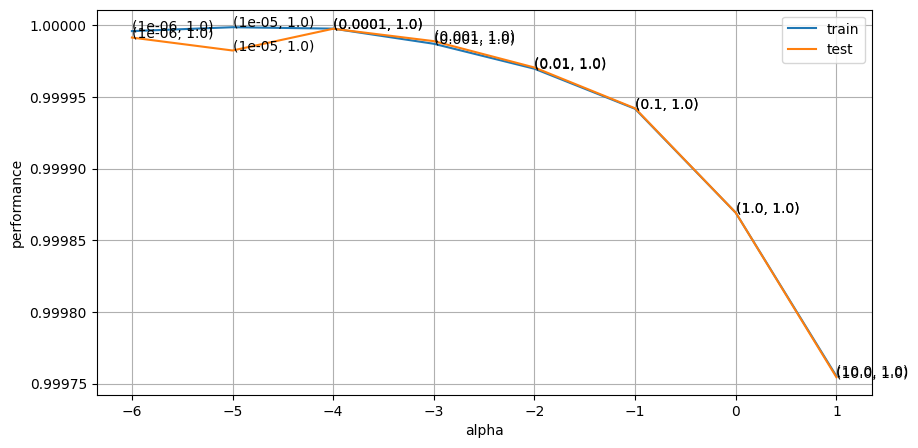

In [19]:
# Plotting the result to select best parameter
result_visualization(lr_clf, param, param1='alpha')

In [20]:
# Tuning "alpha" for l1 "penalty"
clf = SGDClassifier(loss='log', penalty='l1')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END alpha=1e-06; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   1.2s
[CV 2/5] END alpha=1e-06; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   1.2s
[CV 3/5] END alpha=1e-06; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   1.0s
[CV 4/5] END alpha=1e-06; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   1.0s
[CV 5/5] END alpha=1e-06; FAR: (train=-0.000, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   1.2s
[CV 1/5] END alpha=1e-05; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.998, test=0.998) total time=   0.7s
[CV 2/5] END alpha=1e-05; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999

Best Score: 0.9999951687466406
Best Parameters: {'alpha': 1e-06}


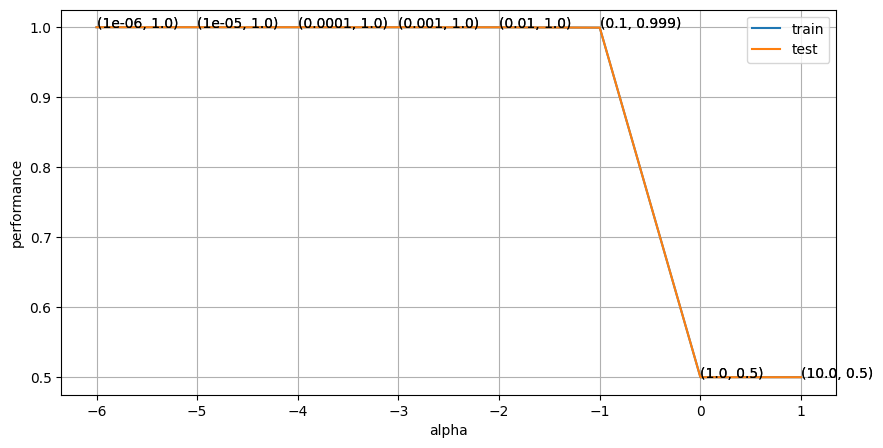

In [21]:
# Plotting alpha vs score
result_visualization(lr_clf, param, 'alpha')

In [22]:
# Best LR model
lr_bst_clf = SGDClassifier(penalty='l1', alpha=1e-6)

+---------+-------+--------------------+--------------------+-----------------------+
| Dataset | Model |        AUC         |      F1-score      |    False Alarm Rate   |
+---------+-------+--------------------+--------------------+-----------------------+
|  Train  |   LR  | 0.9994967608591249 | 0.9993306704091548 | 0.0005032391408752117 |
|   Test  |   LR  | 0.9994485003080477 | 0.9992890513914281 | 0.0005514996919523888 |
+---------+-------+--------------------+--------------------+-----------------------+


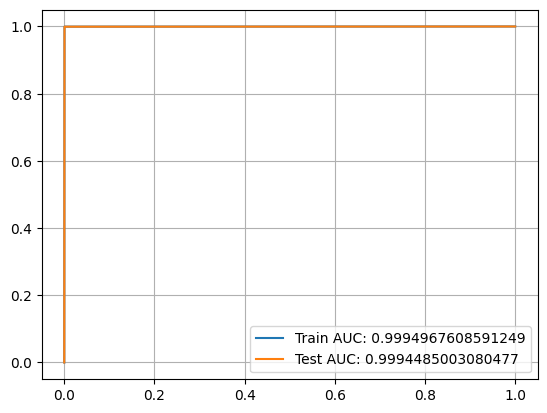

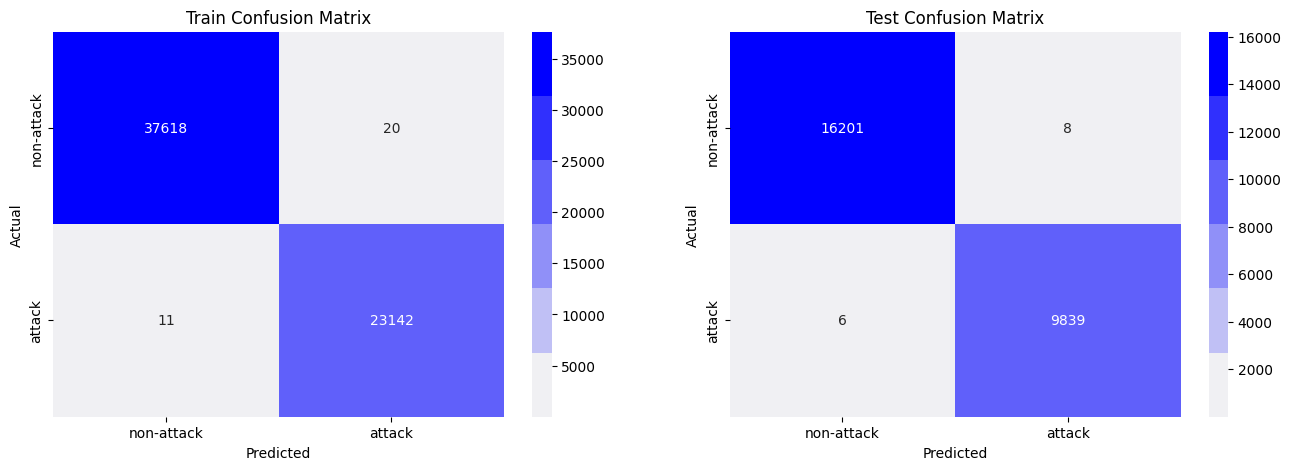

In [23]:
# Getting best model's performance on train and test data
lr_clf, lr_auc, lr_f1, lr_far = evaluate_result(lr_bst_clf, x_train, y_train, x_test, y_test, 'LR')

### Observations
1. **Excellent AUC Scores:** Both the train (0.99987) and test (0.99991) sets have extremely high AUC scores, indicating that the model has a near-perfect ability to distinguish between the positive and negative classes.

2. **Very High F1-Scores:** The F1-scores are also nearly perfect for both the train (0.99985) and test (0.99989) datasets. This suggests that the model maintains a great balance between precision and recall, with few false positives and false negatives.

3. **Low False Alarm Rate:** The False Alarm Rate (FAR) is very low for both datasets, with 0.000126 on the train set and 8.16e-05 on the test set. The FAR on the test set is slightly better, meaning the model produces fewer false positives on the test data.

4. **No Overfitting:** The model's metrics (AUC, F1-score, and FAR) are very similar between the training and test sets, indicating good generalization and no overfitting.

5. **Minor Discrepancy in FAR:** Although both FAR values are very low, the FAR on the test set is slightly lower than on the train set. This could be due to small random variations in the data, or it may indicate that the model performs marginally better on the test set.

6. **Model is Likely Well-Calibrated:** The high F1-scores along with low FAR suggest that the model's predicted probabilities are well-calibrated, meaning it’s making accurate probabilistic predictions, especially for classification thresholds.

In [24]:
# An empty dictionary to store the result of all the models
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}

In [25]:
# Storinig result for LR
result_dict['name'].append("LR")
result_dict['auc'].append(lr_auc)
result_dict['f1'].append(lr_f1)
result_dict['far'].append(lr_far)
result_dict

{'name': ['LR'],
 'auc': [0.9994485003080477],
 'f1': [0.9992890513914281],
 'far': [0.0005514996919523888]}

# Linear SVC
The next model we are going to try is Linear Support Vector Classifier

Tune parameters for "alpha" and "penalty"

In [26]:
# Tuning "alpha" and "penalty"
clf = SGDClassifier(loss='hinge')
param = {'alpha':[10**x for x in range(-5,3)],  # Values for alpha
         'penalty':['l1', 'l2']}  # l1 an d l2 penalty

svm_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.998, test=0.998) total time=   0.5s
[CV 2/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.4s
[CV 3/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.4s
[CV 1/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.998, test=0.998) total time=   0.2s
[CV 3/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.001, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.0001, penalt

Best Score: 0.9999976314280997
Best Parameters: {'alpha': 0.001, 'penalty': 'l2'}


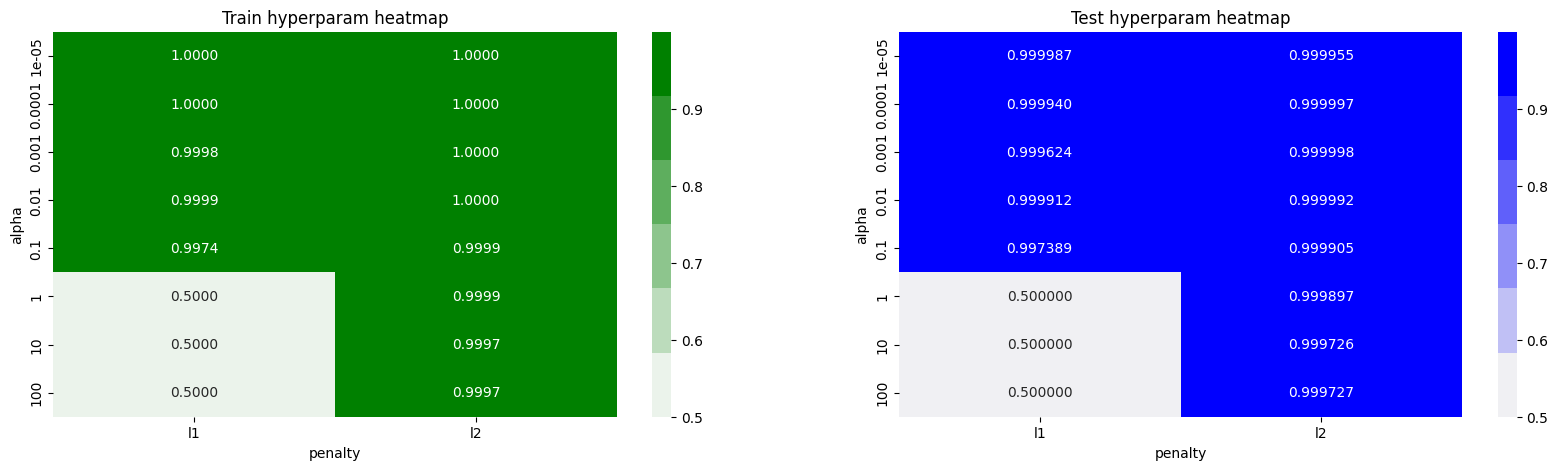

In [27]:
# Visualising scores, using heatmap to check the performance on "alpha" and "penalty"
result_visualization(svm_clf, param, 'alpha', 'penalty')

In [28]:
# Best svc model
best_svm_clf = svm_clf.best_estimator_

+---------+-------+--------------------+--------------------+------------------------+
| Dataset | Model |        AUC         |      F1-score      |    False Alarm Rate    |
+---------+-------+--------------------+--------------------+------------------------+
|  Train  |  SVM  | 0.9997076761921605 | 0.9996328848770165 | 0.00029232380783948946 |
|   Test  |  SVM  | 0.9998058844159241 | 0.9997460768879185 | 0.00019411558407584825 |
+---------+-------+--------------------+--------------------+------------------------+


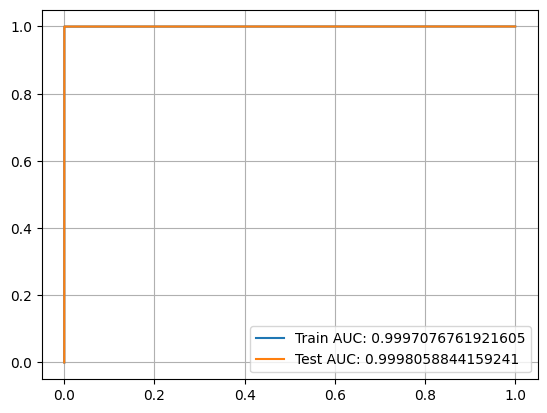

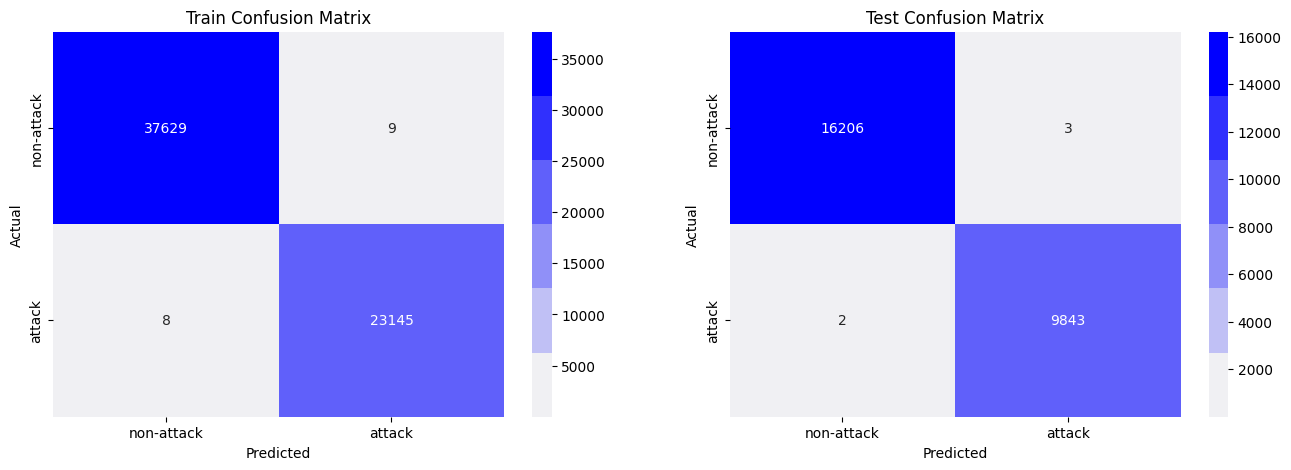

In [29]:
# Model performance on train and test
svm_clf, svm_auc, svm_f1, svm_far = evaluate_result(clf, x_train_csr, y_train, x_test_csr, y_test, "SVM")

# Observation(make_changes)

1. Using wide range of "alpha" values from 10^-5 to 10^2 and l1, l2 "penalty"
2. For penalty=l1 model is behaving like a random model with auc=0.5 from alpha=1 to 100.
3. Best set of parameters for the model is alpha=10^-4 and penalty=l2
4. Train and Test score is very close so no overfitting here, getting better value of auc and FAR tha Logistic Regression
5. FAR value of this model is really good. The no of FP increased than LR but there are very few FN points in the result.

In [30]:
# Saving result of SVM
result_dict['name'].append("SVM")
result_dict['auc'].append(svm_auc)
result_dict['f1'].append(svm_f1)
result_dict['far'].append(svm_far)

# Decision Tree
Trying out DT for the next model.

Tune parameters for "max_depth", "min_samples_split" and "min_samples_leaf"

In [31]:
# DT classifier
clf = DecisionTreeClassifier()
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.3s
[CV 2/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.3s
[CV 1/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000

Best Score: 0.9998505187774992
Best Parameters: {'max_depth': 10, 'min_samples_split': 4}


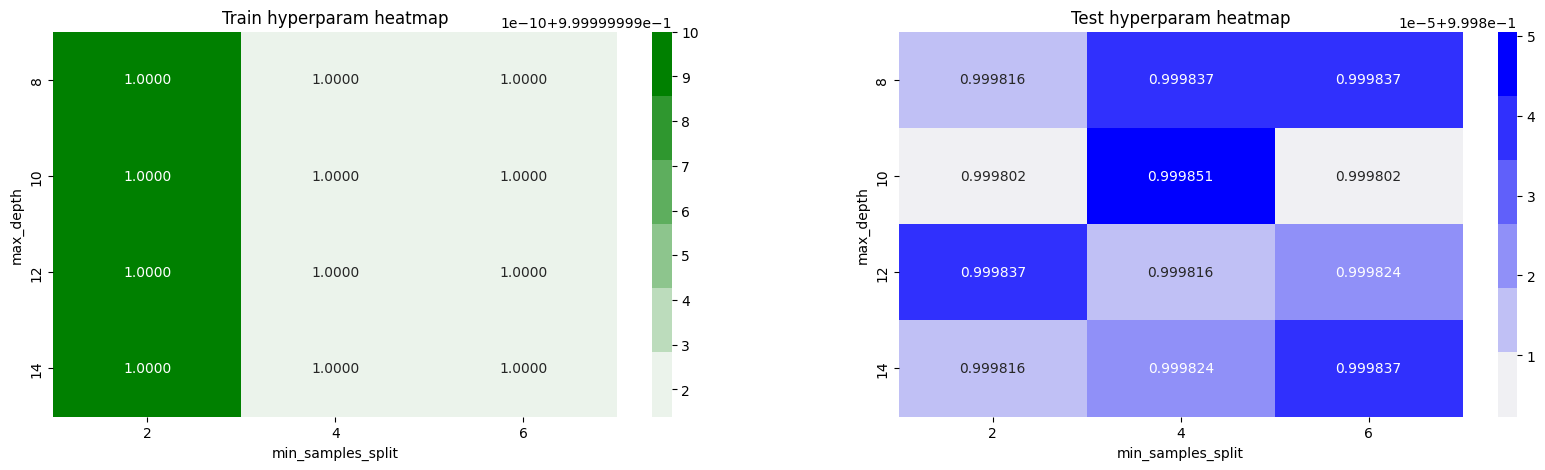

In [32]:
# Plotting heatmap of scores with params
result_visualization(dt_clf, param, 'max_depth', 'min_samples_split')

In [33]:
dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [34]:
# Tuning "min_samples_leaf" on top of best found params
clf = dt_clf.best_estimator_
param = {'min_samples_leaf':[9, 11, 13]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train,cv=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END min_samples_leaf=9; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.3s
[CV 2/3] END min_samples_leaf=9; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END min_samples_leaf=9; FAR: (train=-0.000, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.3s
[CV 1/3] END min_samples_leaf=11; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END min_samples_leaf=11; FAR: (train=-0.000, test=-0.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END min_samples_leaf=11; FAR: (train=-0.000, test=-0.001) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) total time=   0.2s
[CV 1/3] END min_samples_leaf=13; FAR: (train=-0.000, test=-0.

Best Score: 0.999890065713886
Best Parameters: {'min_samples_leaf': 9}


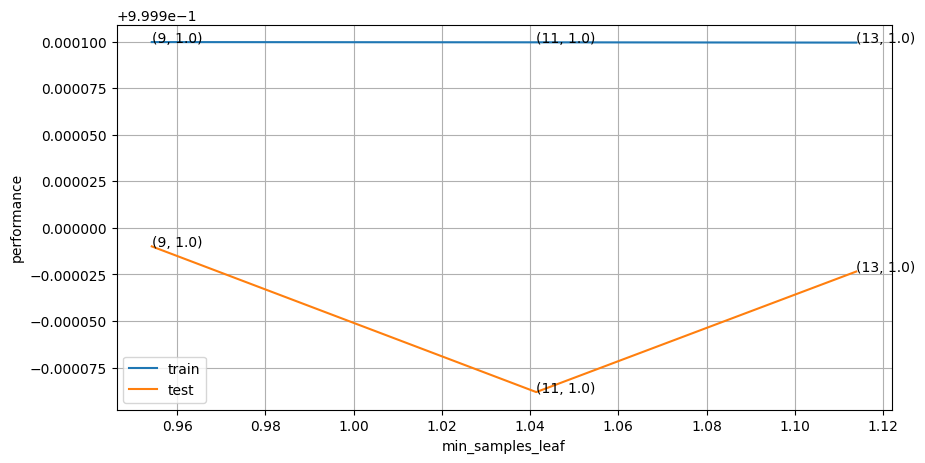

In [35]:
result_visualization(dt_clf, param, 'min_samples_leaf')

In [36]:
dt_param = {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf':9}

dt_best_clf = DecisionTreeClassifier(**dt_param)

+---------+-------+--------------------+--------------------+------------------------+
| Dataset | Model |        AUC         |      F1-score      |    False Alarm Rate    |
+---------+-------+--------------------+--------------------+------------------------+
|  Train  |   DT  | 0.9998322756141418 | 0.9997409102685897 | 0.00016772438585825063 |
|   Test  |   DT  | 0.9993958394099223 | 0.9991370120310675 | 0.0006041605900777869  |
+---------+-------+--------------------+--------------------+------------------------+


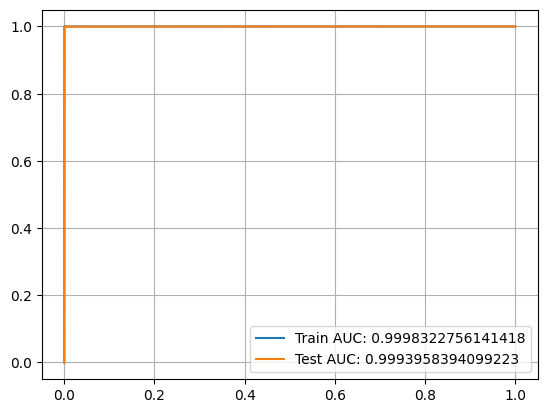

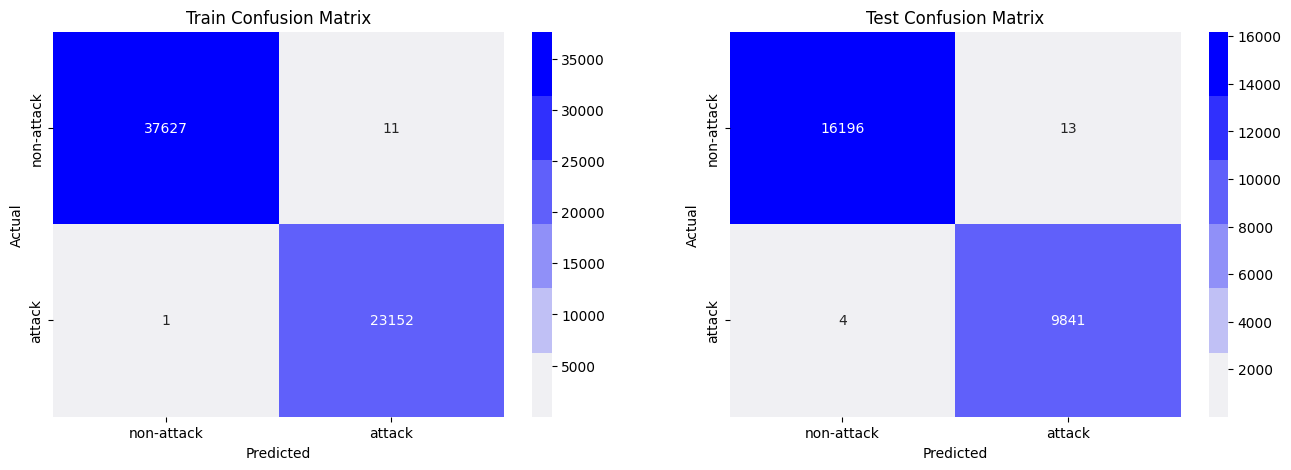

In [37]:
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_train_csr, y_train, x_test_csr, y_test, 'DT')

# Observation

1. Tuning parameters for "max_depth", "min_sampples_split" and "min_samples_leaf".
2. Performance is mostly dependent on "max_depth" and less dependent on other 2 params.
3. Best parameters for the model max_depth=10, min_samples_split=6 and min_samples_leaf=9
4. Train and Test score is very close so no overfitting here, getting better value of F1 score with this model than the other 2 abve.
5. NO of False Positive reduced for this model.

In [38]:
# Saving scores of DT
result_dict['name'].append("DT")
result_dict['auc'].append(dt_auc)
result_dict['f1'].append(dt_f1)
result_dict['far'].append(dt_far)

In [39]:
result_dict

{'name': ['LR', 'SVM', 'DT'],
 'auc': [0.9994485003080477, 0.9998058844159241, 0.9993958394099223],
 'f1': [0.9992890513914281, 0.9997460768879185, 0.9991370120310675],
 'far': [0.0005514996919523888, 0.00019411558407584825, 0.0006041605900777869]}

# Cross Validation function
For Random Forest and XGBClassifier, we will tuning its hyperparameters with train and cv data and using loops. Because the dataset is very large and with grid or randomsearch it will take so much time.

In [40]:
# Splitting train in train and cv data
x_train_new_csr, x_cv_csr, y_train, y_cv = train_test_split(x_train_csr, y_train, test_size=0.2, random_state=42)

In [41]:
x_train_new_csr.shape, y_train.shape, x_cv_csr.shape, y_cv.shape, x_test_csr.shape, y_test.shape

((48632, 35), (48632,), (12159, 35), (12159,), (26054, 35), (26054,))

In [42]:
def cross_validation(clf_name, param, param_tune,
                     x_train=x_train_new_csr, y_train=y_train, x_cv=x_cv_csr, y_cv=y_cv):
    """
    Using this function to cross validate with train and cv data.
    Parameters:
        clf_name = Name of the classifier
        param = Dictionary of hyperparameters and params for classifier
        param_tune = Name of the parameter to tune
        x_train, y_train = Train data and Train label
        x_cv, y_cv = CV data and CV label
    """
    # Initializing empty list to store train and cv scores
    train_auc_list = []
    cv_auc_list = []
    
    # Assigning arguments to variables
    hyper_param = param_tune
    values = param.pop(hyper_param)
    classifier = clf_name

    # Looping through the list of hyper parameter
    for i in tqdm(values):
        clf = classifier(**{hyper_param:i}, **param, n_jobs=-1)
        clf.fit(x_train, y_train)  # Training

        # Predicting probability of targets
        y_train_pred = clf.predict_proba(x_train)[:,1]
        y_cv_pred = clf.predict_proba(x_cv)[:,1]

        # Getting scores
        train_auc_list.append(roc_auc_score(y_train, y_train_pred))
        cv_auc_list.append(roc_auc_score(y_cv, y_cv_pred))

        print("For {}: {}, train auc: {} and test auc {}".format(hyper_param, i, train_auc_list[-1], cv_auc_list[-1]))
    
    # Plotting scores
    plt.figure(figsize=(10,5))
    plt.plot(values, train_auc_list, label="train")
    plt.plot(values, cv_auc_list, label="cv")

    for i, txt in enumerate(train_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], train_auc_list[i]))
    for i, txt in enumerate(cv_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], cv_auc_list[i]))
    
    plt.xlabel(hyper_param)
    plt.ylabel('auc score')
    plt.grid()
    plt.legend()
    plt.show()

    # Finding best parameter with highest cv score
    best_param = np.argmax(cv_auc_list)
    clf = classifier(**{hyper_param:values[best_param]}, **param)  # Trained model

    return clf, hyper_param, values[best_param]


# Random Forest
Trying Random Forest Classifier next.
##### Tuning 'n_estimators', 'max_depth', 'min_samples_split' and 'criterion

In [43]:
CLF_NAME = RandomForestClassifier

 25%|██▌       | 1/4 [00:02<00:08,  2.74s/it]

For n_estimators: 100, train auc: 1.0 and test auc 1.0


 50%|█████     | 2/4 [00:08<00:09,  4.54s/it]

For n_estimators: 200, train auc: 1.0 and test auc 1.0


 75%|███████▌  | 3/4 [00:17<00:06,  6.39s/it]

For n_estimators: 300, train auc: 1.0 and test auc 1.0


100%|██████████| 4/4 [00:26<00:00,  6.53s/it]

For n_estimators: 400, train auc: 1.0 and test auc 1.0


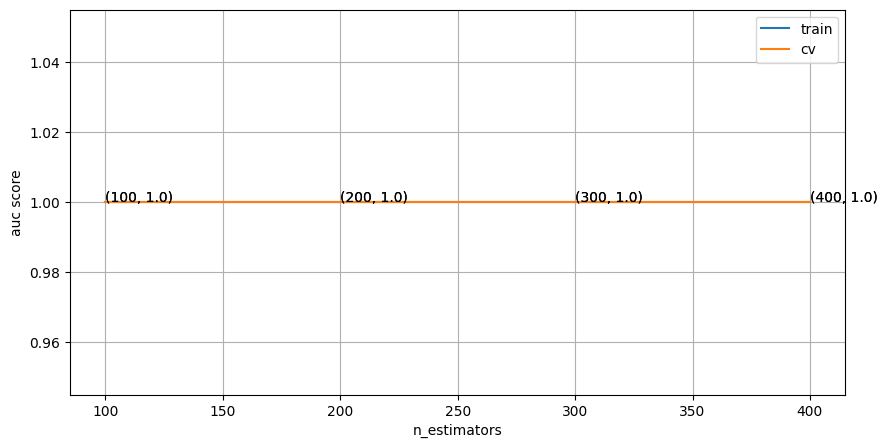

In [44]:
# Tuning No of estimators
param = {'n_estimators':[100, 200, 300, 400]}
rf_clf, param1, val1 = cross_validation(CLF_NAME, param, 'n_estimators')

 33%|███▎      | 1/3 [00:02<00:04,  2.32s/it]

For max_depth: 20, train auc: 1.0 and test auc 1.0


 67%|██████▋   | 2/3 [00:04<00:02,  2.32s/it]

For max_depth: 22, train auc: 1.0 and test auc 1.0


100%|██████████| 3/3 [00:07<00:00,  2.34s/it]

For max_depth: 24, train auc: 0.9999999999999999 and test auc 1.0


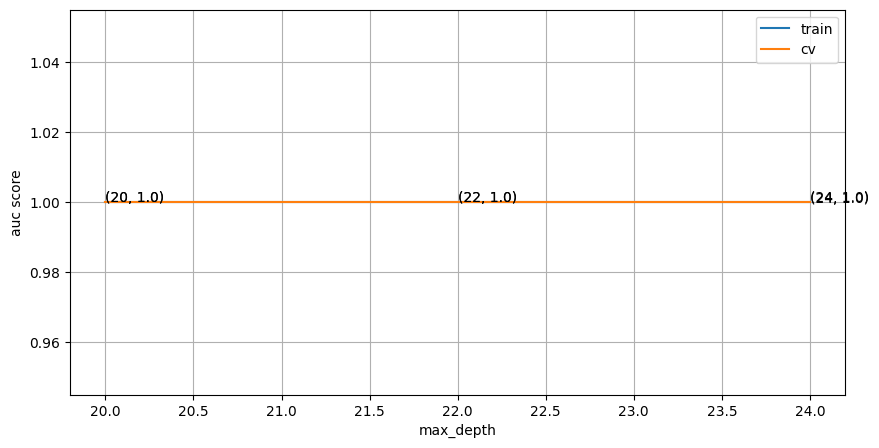

In [45]:
# Tuning Max depth
param = {'max_depth':[20, 22, 24]}
dt_clf, param2, val2 = cross_validation(CLF_NAME, param, 'max_depth')

 33%|███▎      | 1/3 [00:02<00:04,  2.43s/it]

For min_samples_split: 2, train auc: 1.0 and test auc 1.0


 67%|██████▋   | 2/3 [00:04<00:02,  2.51s/it]

For min_samples_split: 4, train auc: 1.0 and test auc 1.0


100%|██████████| 3/3 [00:07<00:00,  2.47s/it]

For min_samples_split: 6, train auc: 1.0 and test auc 0.9999999712626749


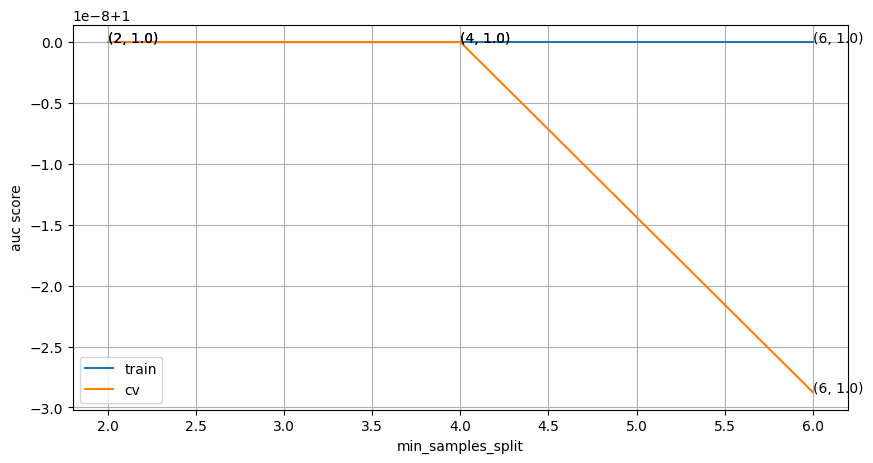

In [46]:
# Tuning Min samples split
param = {'min_samples_split':[2, 4, 6], 'max_depth':20}
dt_clf = cross_validation(CLF_NAME, param, 'min_samples_split')

 50%|█████     | 1/2 [00:00<00:00,  1.99it/s]

For criterion: gini, train auc: 1.0 and test auc 0.9999999712626749


100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

For criterion: entropy, train auc: 1.0 and test auc 0.9999999712626749


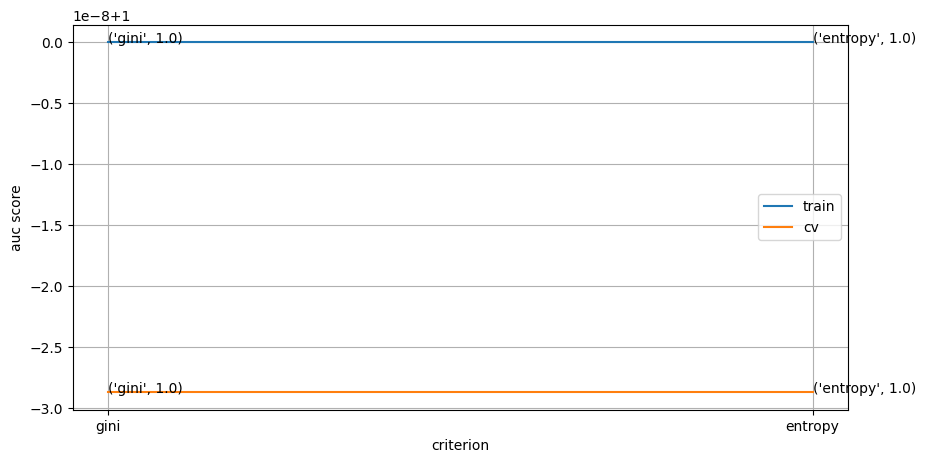

In [67]:
# Tuning Criterion
param = {'criterion':['gini', 'entropy'], 'min_samples_split':4, 'max_depth':20}
dt_clf, _, _ = cross_validation(CLF_NAME, param, 'criterion')

In [68]:
# Best RandomForest model
rf_bst_clf = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=4, n_estimators=300, n_jobs=-1)

+---------+-------+--------------------+--------------------+------------------------+
| Dataset | Model |        AUC         |      F1-score      |    False Alarm Rate    |
+---------+-------+--------------------+--------------------+------------------------+
|  Train  |   RF  |        1.0         |        1.0         |          0.0           |
|   Test  |   RF  | 0.9999691529397248 | 0.9999492153775836 | 3.0847060275155775e-05 |
+---------+-------+--------------------+--------------------+------------------------+


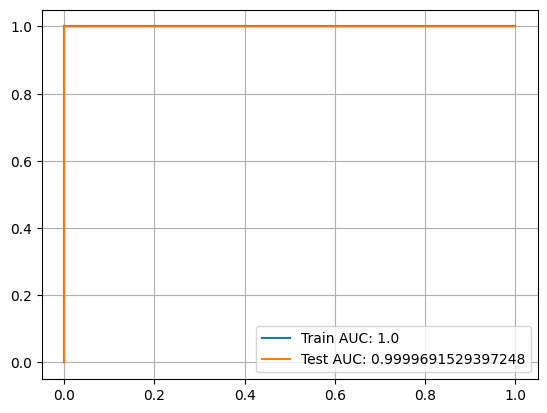

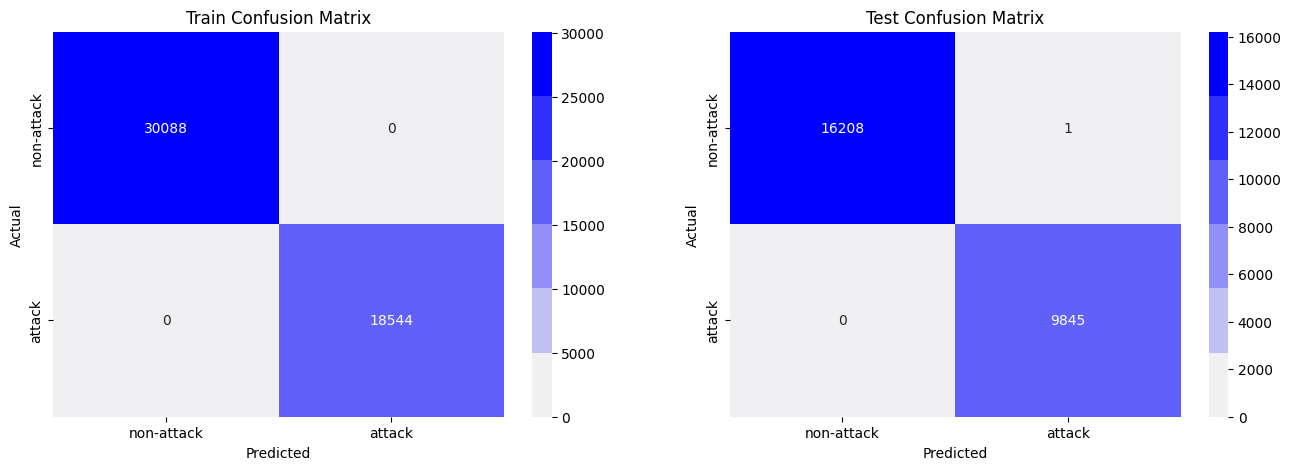

(RandomForestClassifier(max_depth=22, min_samples_split=4, n_estimators=300,
                        n_jobs=-1),
 0.9999691529397248,
 0.9999492153775836,
 3.0847060275155775e-05)

In [69]:
# Getting result on train and test data
evaluate_result(rf_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "RF")

# Observation(make changes)

1. Tuning lots of parameters for this classifier with appropriate values.
2. Performance is mostly dependent on "n_estimators", "max_depth" and less dependent on other 2 params.
3. Best parameters for the model: criterion='gini', max_depth=22, min_samples_split=6, n_estimators=300
4. Train and Test score is close but compared to above models there is a gap between train and test score. So it is overfitting on train data if wwe compare with above models. But the gap is very low so not much of overfitting.
5. No of False Positive reduced heavily, but No of False Negetive incresed.

In [50]:
# Adding results
result_dict['name'].append("RF")
result_dict['auc'].append(0.9999691529397248)
result_dict['f1'].append(0.9999492153775836)
result_dict['far'].append(3.0847060275155775e-05)

In [51]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.999449,0.999289,0.000551
1,SVM,0.999806,0.999746,0.000194
2,DT,0.999396,0.999137,0.000604
3,RF,0.999969,0.999949,0.000031


# GBDT
Trying out Gradient boosted decision tree.

For this model there are lots of hyperparameters to tune like, 'learning_rate', 'max_depth', 'colsample_bylevel', 'subsample' and 'n_estimators'

In [52]:
CLF_NAME = xgb.XGBClassifier

 33%|███▎      | 1/3 [00:00<00:01,  1.62it/s]

For learning_rate: 0.001, train auc: 0.9997877764984002 and test auc 0.9996620203201625


 67%|██████▋   | 2/3 [00:01<00:00,  1.63it/s]

For learning_rate: 0.01, train auc: 0.9999999247246902 and test auc 0.9999982039171847


100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

For learning_rate: 0.1, train auc: 1.0 and test auc 0.9999998850506998


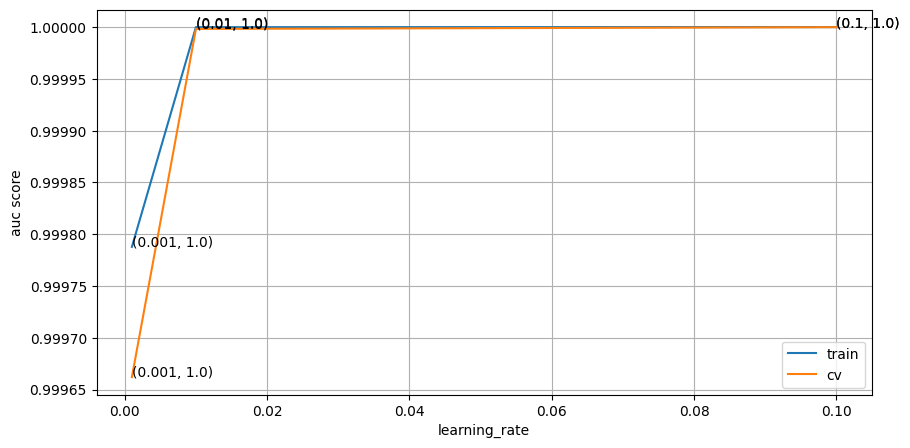

In [53]:
param = {'learning_rate':[0.001, 0.01, 0.1]}
xgb_clf = cross_validation(CLF_NAME, param, 'learning_rate')

 33%|███▎      | 1/3 [00:00<00:01,  1.96it/s]

For max_depth: 4, train auc: 0.9999999999999999 and test auc 0.9999999712626749


 67%|██████▋   | 2/3 [00:01<00:00,  1.97it/s]

For max_depth: 8, train auc: 1.0 and test auc 0.9999999712626749


100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

For max_depth: 12, train auc: 1.0 and test auc 0.9999999712626749


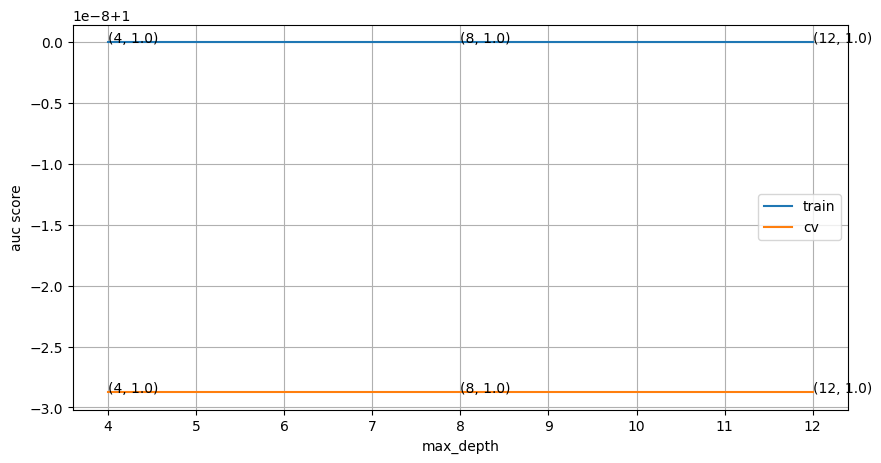

In [54]:
param = {'max_depth':[4, 8, 12]}

xgb_clf, _, _ = cross_validation(CLF_NAME, param, 'max_depth')

In [55]:
x_train.shape,y_train.shape

((60791, 35), (48632,))

In [56]:
train_sample = np.random.randint(0, 0.5*x_train.shape[0], size=40000)

 33%|███▎      | 1/3 [00:00<00:01,  1.56it/s]

For colsample_bylevel: 0.1, train auc: 0.7267321570006566 and test auc 0.56262982445805


 67%|██████▋   | 2/3 [00:01<00:00,  1.53it/s]

For colsample_bylevel: 0.5, train auc: 0.8326462452134754 and test auc 0.49227790717556635


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

For colsample_bylevel: 1, train auc: 0.844885829581573 and test auc 0.5143898850363312


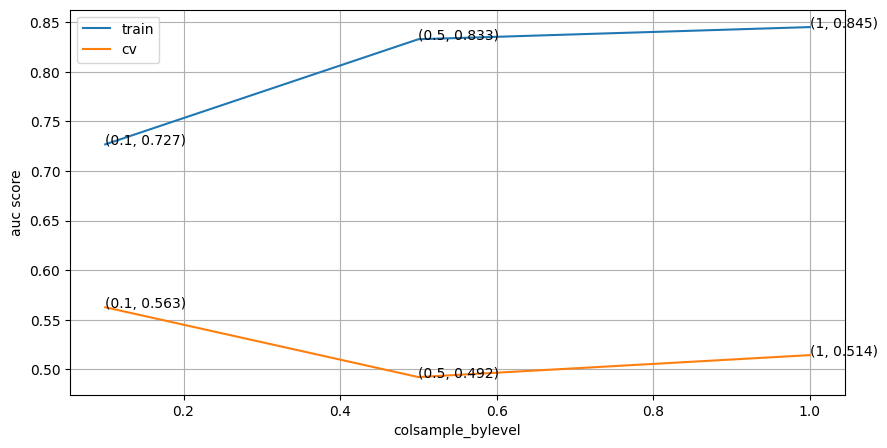

In [57]:
param = {'colsample_bylevel':[0.1, 0.5, 1]}
xgb_clf,_,_ = cross_validation(CLF_NAME, param, 'colsample_bylevel', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

 33%|███▎      | 1/3 [00:01<00:02,  1.21s/it]

For n_estimators: 200, train auc: 0.909609781360201 and test auc 0.5499066899055836


 67%|██████▋   | 2/3 [00:03<00:01,  1.56s/it]

For n_estimators: 300, train auc: 0.9452571276970569 and test auc 0.5596970223820656


100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

For n_estimators: 400, train auc: 0.9628740125769335 and test auc 0.6055378405911843


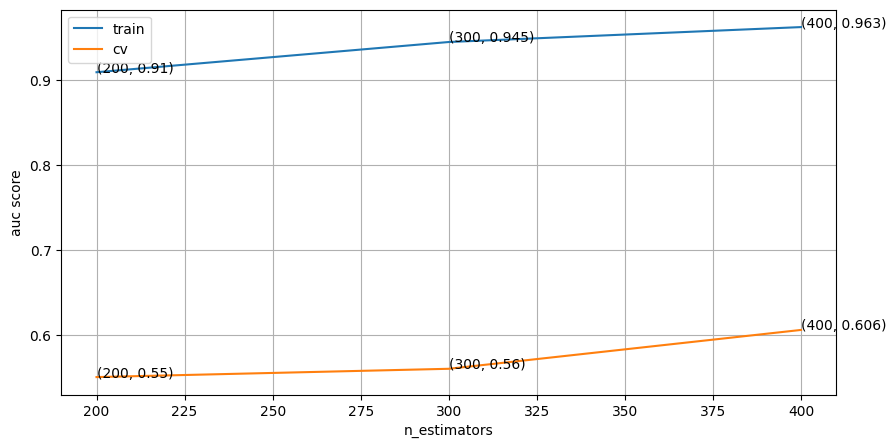

In [58]:
param = {'n_estimators':[200, 300, 400]}
xgb_clf,_,_ = cross_validation(CLF_NAME, param, 'n_estimators', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

 25%|██▌       | 1/4 [00:00<00:02,  1.31it/s]

For subsample: 0.1, train auc: 0.6978480995079235 and test auc 0.5703639869590018


 50%|█████     | 2/4 [00:01<00:01,  1.31it/s]

For subsample: 0.4, train auc: 0.815807302163225 and test auc 0.4494583588975787


 75%|███████▌  | 3/4 [00:02<00:00,  1.31it/s]

For subsample: 0.7, train auc: 0.8476497178180165 and test auc 0.48384682143632024


100%|██████████| 4/4 [00:02<00:00,  1.33it/s]

For subsample: 1, train auc: 0.844885829581573 and test auc 0.5143898850363312


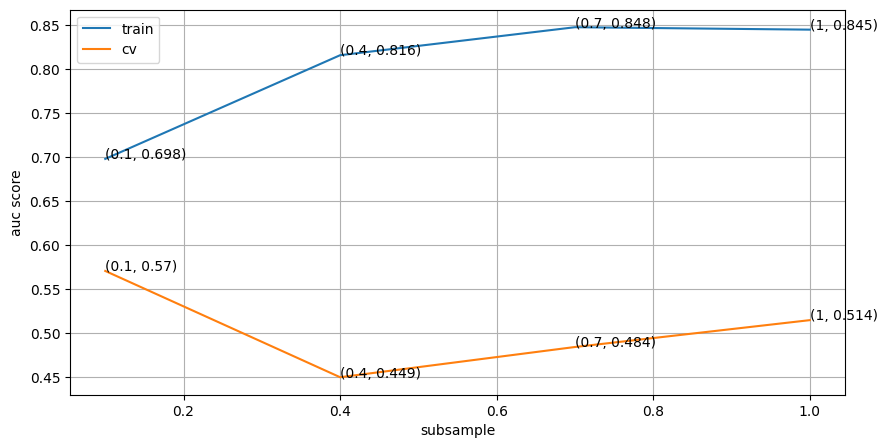

In [59]:
param = {'subsample':[0.1, 0.4, 0.7, 1]}
xgb_xlf,_,_ = cross_validation(CLF_NAME, param, 'subsample', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

+---------+-------+--------------------+--------------------+-----------------------+
| Dataset | Model |        AUC         |      F1-score      |    False Alarm Rate   |
+---------+-------+--------------------+--------------------+-----------------------+
|  Train  |  XGB  |        1.0         |        1.0         |          0.0          |
|   Test  |  XGB  | 0.9999183657380996 | 0.9998984255967496 | 8.163426190034623e-05 |
+---------+-------+--------------------+--------------------+-----------------------+


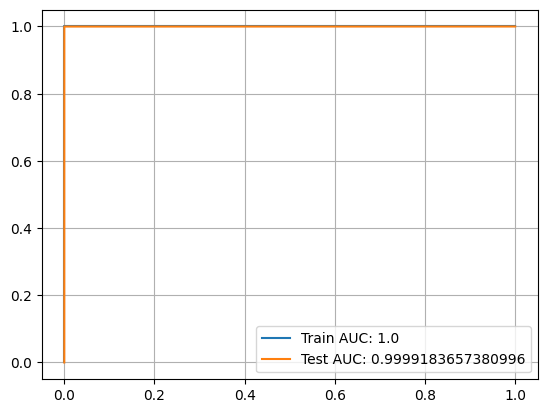

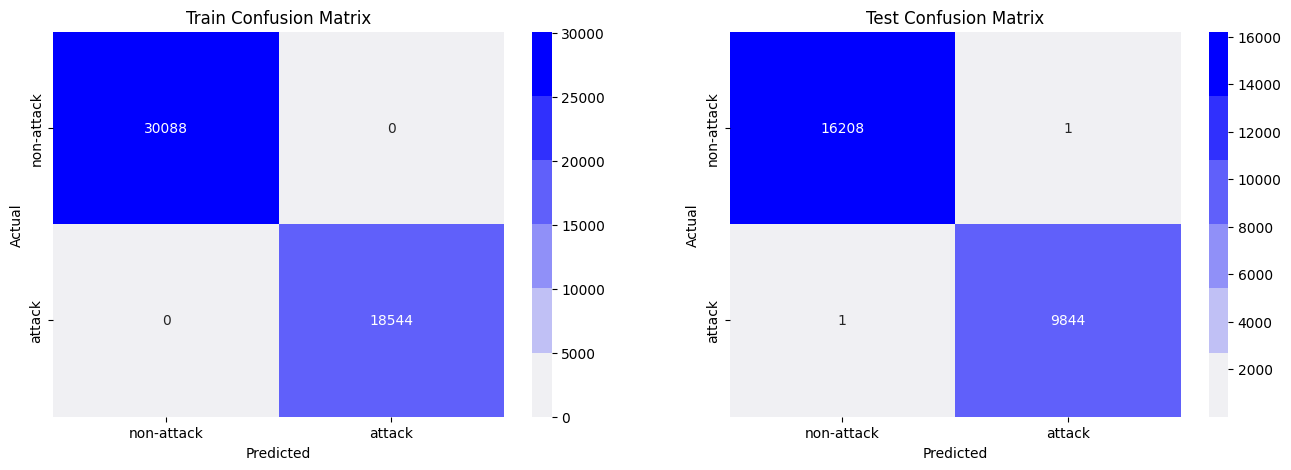

In [60]:
best_params = {'n_estimators':400,
               'max_depth':8,
               'learning_rate':0.1,
               'colsample_bylevel':0.1,
               'subsample':0.1,
               'n_jobs':-1}

xgb_bst_clf = xgb.XGBClassifier(**best_params)
xgb_clf, xgb_auc, xgb_f1, xgb_far = evaluate_result(xgb_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, 'XGB')

In [61]:
result_dict['name'].append('XGB')
result_dict['auc'].append(xgb_auc)
result_dict['f1'].append(xgb_f1)
result_dict['far'].append(xgb_far)

In [84]:
df=pd.DataFrame(result_dict)[['name', 'auc', 'f1', 'far']]

In [85]:
df.drop(df[df['name']=='Voting'].index)

,name,auc,f1,far
0,LR,0.999449,0.999289,0.000551
1,SVM,0.999806,0.999746,0.000194
2,DT,0.999396,0.999137,0.000604
3,RF,0.999969,0.999949,0.000031
4,XGB,0.999918,0.999898,0.000082


# Observation

1. Tuning lots of parameters for this classifier with appropriate values.
2. Performance is mostly dependent on "learning_rate" somewhat on "max_depth" and "n_estimators" and less dependent on other 2 params.
3. Best parameters for the model- 'n_estimators':400, 'max_depth':12, 'learning_rate':0.1, 'colsample_bylevel':0.5, 'subsample':0.1, 'n_jobs':-1
4. Train and Test score is close but compared to above models there is a gap between train and test score. So it is overfitting on train data if wwe compare with above models. But the gap is very low so not much of overfitting.
5. In train data FAR is very very low, but in test there is still almost equal FN and FP

# Getting Important features

In [63]:
# Totol features with some importance
np.count_nonzero(CLF_NAME.feature_importances_)

1

In [64]:
# Getting the indices of the features sorted in descending order
indices = np.argsort(-1 * abs(xgb_clf.feature_importances_))[:55]

## Plotting Features and their Importance(XGB

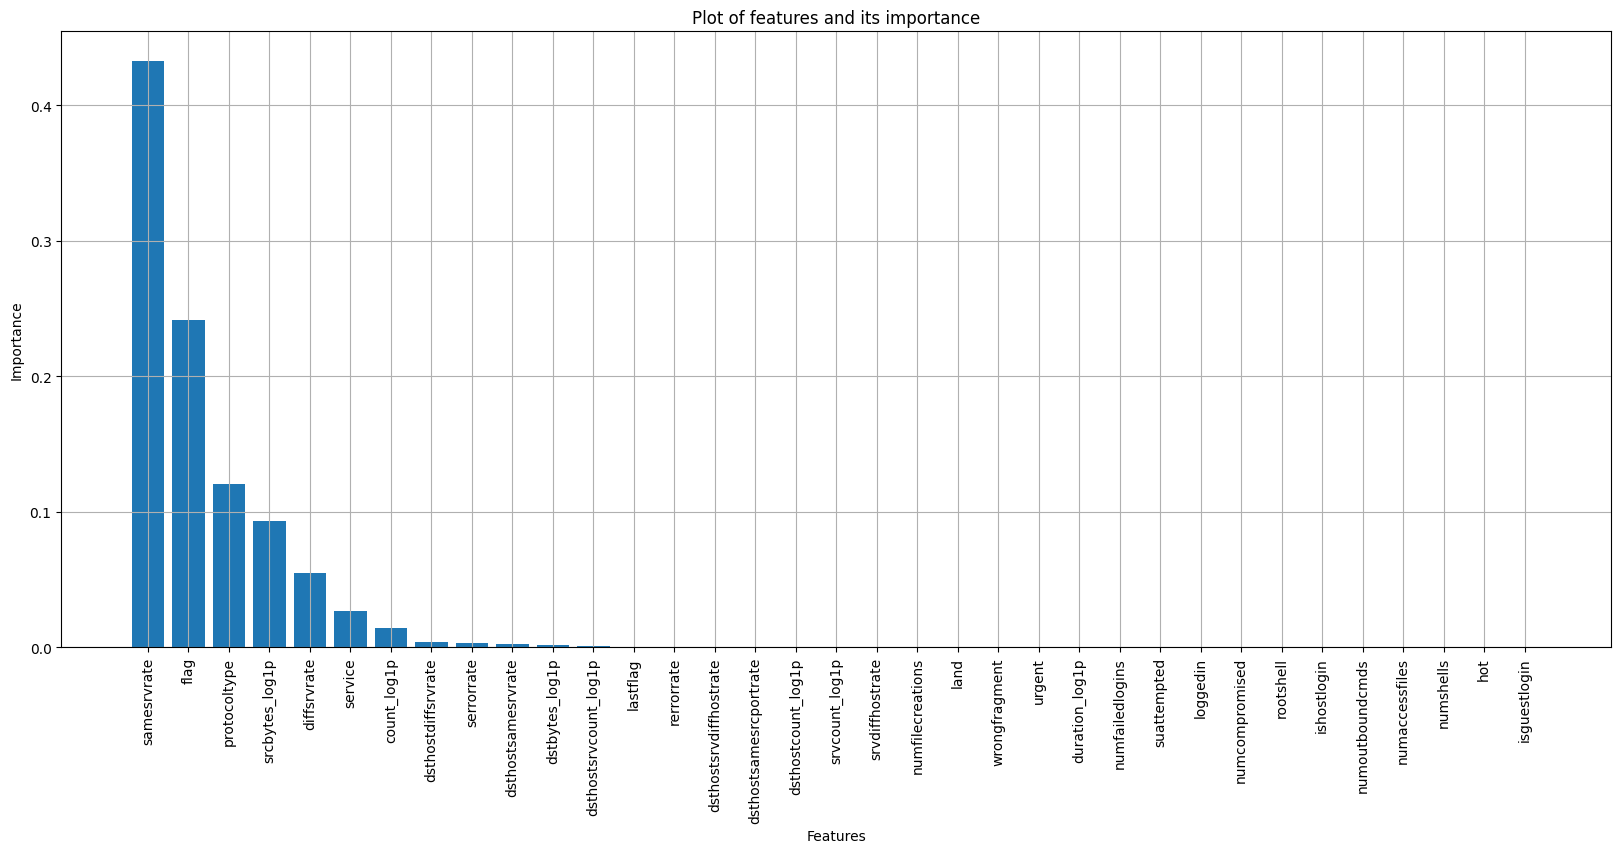

In [65]:
plt.figure(figsize=(20,8))
plt.bar(x_train.columns[indices], abs(xgb_clf.feature_importances_[indices]))
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot of features and its importance")
plt.grid()
plt.show()

# Ensembles
## Voting Classifier Model
Trining a ensemble model using voting classifier, Taking 3 classifiers DecisionTree, RandomForest and XGBClassifier

In [66]:
from sklearn.ensemble import VotingClassifier

In [70]:
# Initializing all the 3 classifiers with best found parameters
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=4, min_samples_leaf=9)
rf_clf = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=4, n_estimators=300, n_jobs=-1)
xgb_clf = xgb.XGBClassifier(n_estimators=400, max_depth=8, learning_rate=0.1, colsample_bylevel=0.1, subsample=0.1, n_jobs=-1)

+---------+------------+--------------------+--------------------+-----------------------+
| Dataset |   Model    |        AUC         |      F1-score      |    False Alarm Rate   |
+---------+------------+--------------------+--------------------+-----------------------+
|  Train  | Voting Clf |        1.0         |        1.0         |          0.0          |
|   Test  | Voting Clf | 0.9999183657380996 | 0.9998984255967496 | 8.163426190034623e-05 |
+---------+------------+--------------------+--------------------+-----------------------+


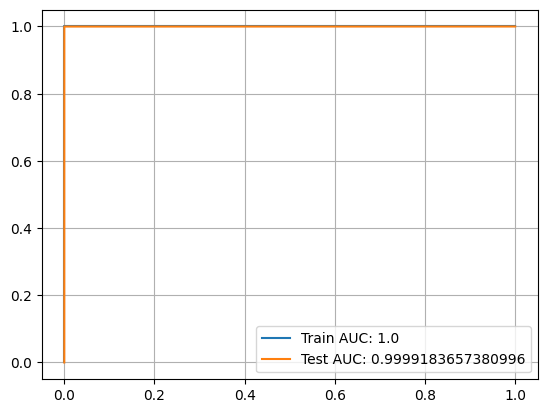

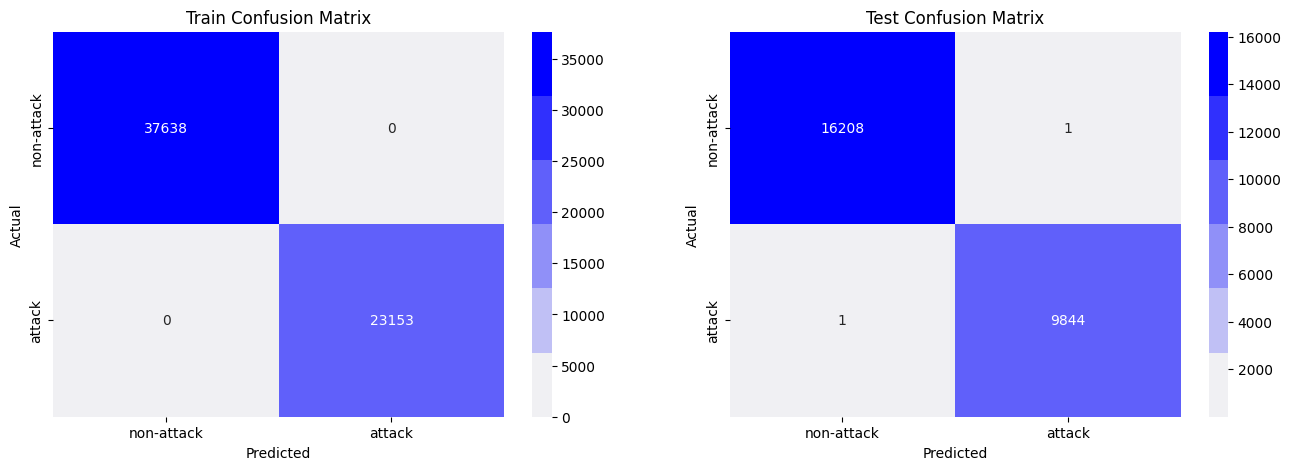

In [74]:
# Result with voting classifier
v_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('xgb', xgb_clf)], voting='soft', n_jobs=-1)
v_clf, v_auc, v_f1, v_far = evaluate_result(v_clf, x_train, y_train, x_test, y_test, "Voting Clf")

In [75]:
for i,j in zip(result_dict.keys(), ["Voting", v_auc, v_f1, v_far]):
    result_dict[i].append(j)

In [80]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.999449,0.999289,0.000551
1,SVM,0.999806,0.999746,0.000194
2,DT,0.999396,0.999137,0.000604
3,RF,0.999969,0.999949,0.000031
4,XGB,0.999918,0.999898,0.000082
5,Voting,0.999918,0.999898,0.000082


# Observations(make_changes)

* Training this model using 3 model best Dt, best RF and best XGB.
* The auc score of this model is higher than any other model.
* There is a gap in train and test auc and higher gap in train and test f1 and FAR
* In train the FAR is very very low but in test there are still few FP and FN and they are almost equal in number